<a href="https://colab.research.google.com/github/GustavoHDLC1/Colab_Files_PADP/blob/main/PracticaReduccionNumerosidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Enlace GitHub](https://github.com/GustavoHDLC1/Colab_Files_PADP/blob/main/PracticaReduccionNumerosidad.ipynb)

# ==========================================================================
# 📝 Tarea: Reducción de la Numerosidad con CNN, ENN y K-medias usando SVM
# 📊 Dataset: Breast Cancer (Scikit-Learn)
# 👤 Autor/a: [Nombre del estudiante]
# 📅 Fecha: [dd/mm/aaaa]
# ==========================================================================

## 🔍 Descripción:
En este cuaderno aplicarás técnicas de reducción de la numerosidad (CNN, ENN, K-medias) al conjunto de datos Breast Cancer y analizarás su efecto en el rendimiento de un modelo SVM.

## ==========================================================================

## 1. Cargar librerías necesarias
Escribe aquí la importación de librerías: numpy, pandas, matplotlib, seaborn, sklearn (datasets, model_selection, preprocessing, metrics, svm, kmeans), etc.

En el caso de los códigos de ENN, CNN, estos  deberás tomarlos del cuaderno que contiene la teoría y ejemplos.

In [1]:
#1. Cargar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import random
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.utils.validation import check_X_y
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
pd.set_option('display.max_columns', 50)

# --------------------------------------------------------------------------

## 2. Cargar y explorar el conjunto de datos Breast Cancer
- Cargar el dataset con sklearn.datasets.load_breast_cancer
- Explora las dimensiones, variables, y distribución de clases

In [2]:
#2. Cargar y explorar el conjunto de datos Breast Cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [3]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
cols_num = (df.drop(columns='target')).columns.tolist()

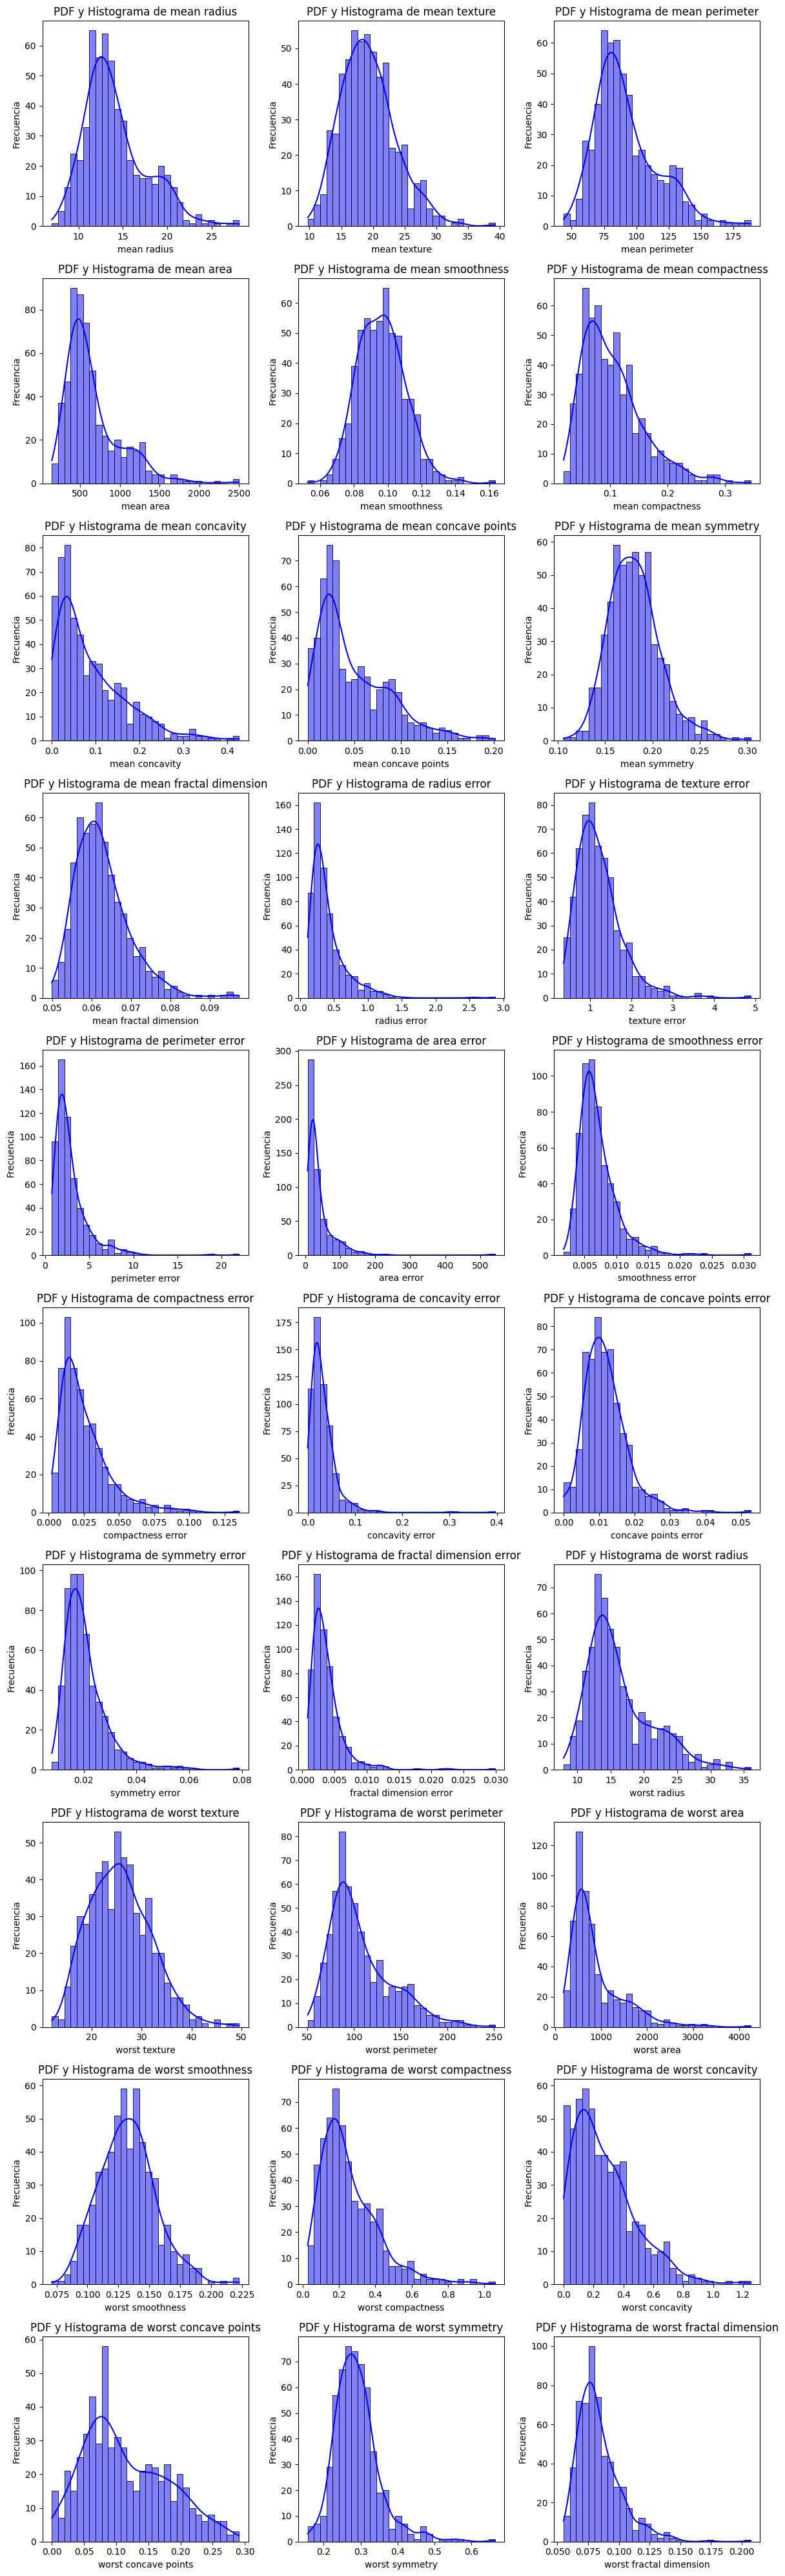

In [7]:
columns = cols_num
n = len(columns)
rows = math.ceil(n / 3)  # 3 columnas por fila
# Crear los gráficos de PDF e Histograma
plt.figure(figsize=(12, 4*rows))
for i, col in enumerate(columns, 1):
    plt.subplot(rows, 3, i)  # Ajustar la cantidad de subgráficos según el número de columnas
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'PDF y Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

In [8]:
df['target'].value_counts()

,count
target,
1,357
0,212


In [9]:
df['target'].value_counts(1)*100

,proportion
target,
1,62.741652
0,37.258348


# --------------------------------------------------------------------------

## 3. Preprocesamiento
 - Escalamiento de características (StandardScaler)
 - División del conjunto en entrenamiento y prueba
 - usar hold-out de 70% y 30%



In [10]:
X = df.drop(columns='target')
y = df['target']

In [11]:
# 3. Preprocesamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # Aprende media y desviación estándar del entrenamiento
X_test_scaled = scaler.transform(X_test)         # Aplica las mismas transformaciones al test

# --------------------------------------------------------------------------

## 4. Aplicar técnica CNN (Condensed Nearest Neighbor)

- Aplicar CNN sobre el conjunto de entrenamiento
- Mostrar el tamaño del conjunto reducido



In [12]:
#4. Aplicar técnica CNN (Condensed Nearest Neighbor)
class CNN:
    """
    Condensed Nearest Neighbors (CNN) - versión adaptada para datos densos.

    Este algoritmo reduce el conjunto de entrenamiento reteniendo solo
    las instancias necesarias para preservar la capacidad de clasificación
    bajo la regla 1-NN (o k-NN si se ajusta n_neighbors).

    Basado en:
    P. E. Hart, The condensed nearest neighbor rule (1968).
    """

    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors
        self.classifier = KNeighborsClassifier(n_neighbors=self.n_neighbors)
        self.sample_indices_ = []

    def select_data(self, X, y):
        # Validación de entrada: datos densos
        X, y = check_X_y(X, y, accept_sparse=False)

        idx_s = []  # índice de instancias seleccionadas
        classes = np.unique(y)
        self.classes_ = classes

        # Iniciar con una instancia aleatoria por clase
        for cur_class in classes:
            mask = np.where(y == cur_class)[0]
            choose_id = random.choice(mask)
            idx_s.append(choose_id)

        # Revisión aleatoria del resto de las instancias
        train_idx = list(range(len(y)))
        random.shuffle(train_idx)

        flag = True
        while flag:
            flag = False
            self.classifier.fit(X[idx_s], y[idx_s])
            for idx in train_idx:
                if idx not in idx_s:
                    x_i = X[idx].reshape(1, -1)
                    if self.classifier.predict(x_i) != [y[idx]]:
                        idx_s.append(idx)
                        self.classifier.fit(X[idx_s], y[idx_s])
                        flag = True

        self.X_ = X[idx_s]
        self.y_ = y[idx_s]
        self.sample_indices_ = sorted(idx_s)
        self.reduction_ = 1.0 - len(self.y_) / len(y)
        return self.X_, self.y_

In [13]:
# Aplicar CNN
cnn = CNN(n_neighbors=1)
X_cnn, y_cnn = cnn.select_data(X_train_scaled, y_train)

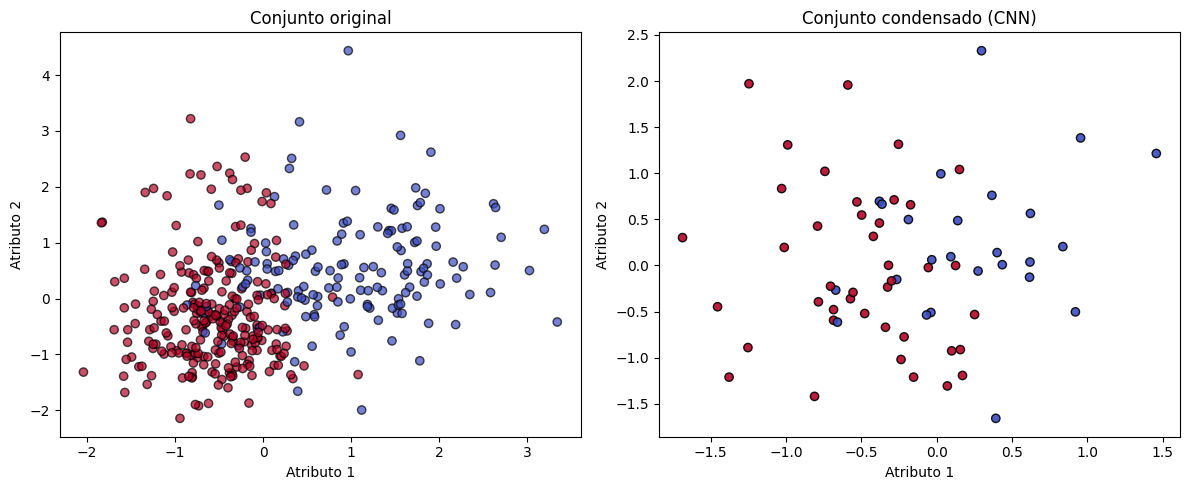

Instancias originales: 398
Instancias tras CNN:   66
Reducción: 83.42%


In [14]:
# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("Conjunto original")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")

plt.subplot(1, 2, 2)
plt.scatter(X_cnn[:, 0], X_cnn[:, 1], c=y_cnn, cmap='coolwarm', edgecolor='k', alpha=0.9)
plt.title("Conjunto condensado (CNN)")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")

plt.tight_layout()
plt.show()

print(f"Instancias originales: {len(y_train)}")
print(f"Instancias tras CNN:   {len(y_cnn)}")
print(f"Reducción: {100 * cnn.reduction_:.2f}%")

Se eliminó la mayor parte de las observaciones, por lo que la reducción fue muy agresiva en este caso, dejando un número de ejemplos muy bajo para poder entrenar el modelo, lo que podría generar subajuste

 --------------------------------------------------------------------------

## 5. Aplicar técnica ENN (Edited Nearest Neighbor)

- Aplicar ENN sobre el conjunto de entrenamiento
- Mostrar el tamaño del conjunto reducido



In [15]:
# 5. Aplicar técnica ENN (Edited Nearest Neighbor)
class ENN:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors
        self.classifier = KNeighborsClassifier(n_neighbors=self.n_neighbors)
        self.sample_indices_ = []

    def fit(self, X, y):
        # Validación inicial
        X, y = check_X_y(X, y, accept_sparse=False)

        mask = np.ones(len(y), dtype=bool)
        tmp_m = np.ones(len(y), dtype=bool)

        indices = list(range(len(y)))
        random.shuffle(indices)

        for i in indices:
            tmp_m[i] = False
            self.classifier.fit(X[tmp_m], y[tmp_m])
            x_i = X[i].reshape(1, -1)
            y_pred = self.classifier.predict(x_i)
            if y_pred[0] != y[i]:
                mask[i] = False
            tmp_m[i] = True

        self.X_ = X[mask]
        self.y_ = y[mask]
        self.sample_indices_ = np.where(mask)[0]
        self.reduction_ = 1 - len(self.y_) / len(y)
        return self

In [16]:
# Aplicar ENN
selector = ENN(n_neighbors=5)
selector.fit(X_train_scaled, y_train)

# Seleccionar subconjunto
idx = selector.sample_indices_
X_clean, y_clean = X_train_scaled[idx], y_train.values[idx]

print(f"Original: {len(y_train)} muestras")
print(f"Limpio:   {len(y_clean)} muestras")

Original: 398 muestras
Limpio:   385 muestras


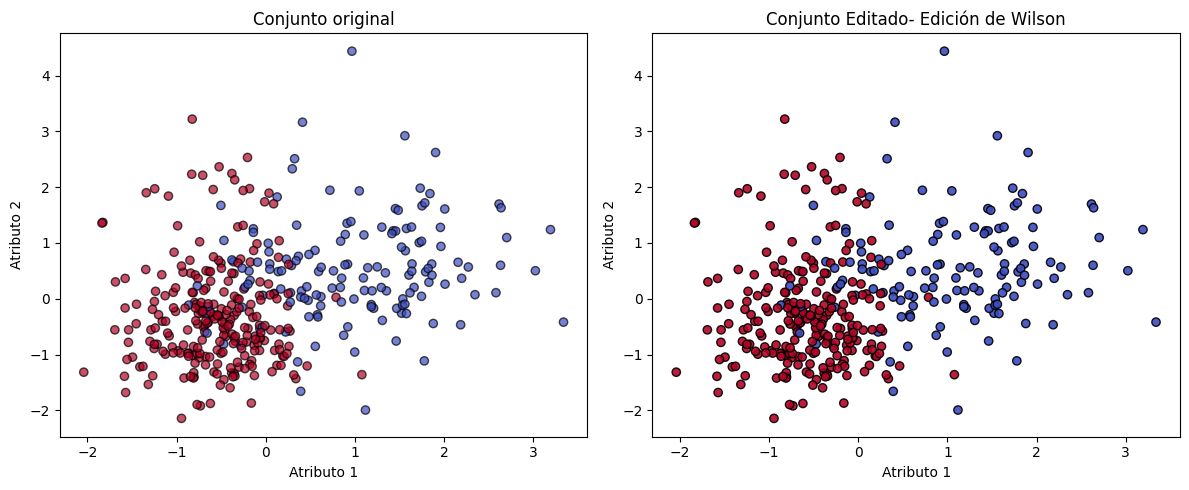

In [17]:
# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("Conjunto original")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")

plt.subplot(1, 2, 2)
plt.scatter(X_clean[:, 0], X_clean[:, 1], c=y_clean, cmap='coolwarm', edgecolor='k', alpha=0.9)
plt.title("Conjunto Editado- Edición de Wilson")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")

plt.tight_layout()
plt.show()

A diferencia de CNN, en este caso el número de observaciones que se eliminaron fueron muy pocas, 13 en total, por lo que no podría determinarse si hay una diferencia significativa que mejore el rendimiento del modelo.

# --------------------------------------------------------------------------

## 6. Aplicar reducción mediante K-medias
- Realizar agrupamiento por clase y representar cada grupo con su centroide. Elige la mitad de los elementos de cada clase como el valor del número de centroides
- Generar un nuevo conjunto reducido con los centroides como prototipos



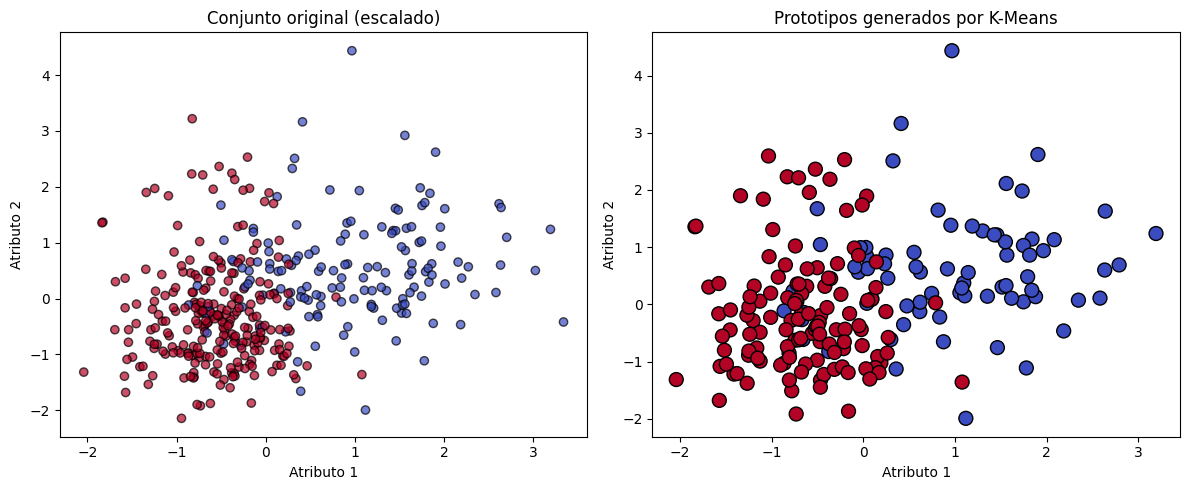

In [18]:
# 6. Aplicar reducción mediante K-medias
# Número de prototipos por clase

classes = np.unique(y_train)

# 4. Aplicar KMeans por clase
prototypes = []
labels = []

for c in classes:
    # Subconjunto de la clase actual
    class_data = X_train_scaled[y_train == c]

    prototypes_per_class = max(1, len(class_data) // 2)

    # KMeans sobre los datos de la clase
    kmeans = KMeans(n_clusters=prototypes_per_class, random_state=42)
    kmeans.fit(class_data)

    # Guardar prototipos y sus etiquetas
    prototypes.append(kmeans.cluster_centers_)
    labels.extend([c] * prototypes_per_class)

# 5. Concatenar resultados
X_proto = np.vstack(prototypes)
y_proto = np.array(labels)

# 6. Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Conjunto original
axes[0].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='coolwarm', edgecolor='k', alpha=0.7)
axes[0].set_title("Conjunto original (escalado)")
axes[0].set_xlabel("Atributo 1")
axes[0].set_ylabel("Atributo 2")

# Prototipos generados
axes[1].scatter(X_proto[:, 0], X_proto[:, 1], c=y_proto, cmap='coolwarm', edgecolor='k', s=100)
axes[1].set_title("Prototipos generados por K-Means")
axes[1].set_xlabel("Atributo 1")
axes[1].set_ylabel("Atributo 2")

plt.tight_layout()
plt.show()

 --------------------------------------------------------------------------

##7. Entrenar SVM sobre cada conjunto reducido
- Entrenar un modelo SVM (SVC) sobre:
 * los datos originales
 * datos reducidos con CNN
 * datos reducidos con ENN
 * datos reducidos con K-medias
- Evaluar cada modelo con accuracy, F1-score



In [19]:
#7. Entrenar SVM sobre cada conjunto reducido
def plot_decision_boundary(model, X, y):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.title(f"Frontera de decisión: {model}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

Accuracy promedio (CV): 0.9723
Accuracy global: 0.9724
F1 (macro): 0.9704
F1 (micro): 0.9724
F1 por clase:
  malignant: 0.9627
  benign: 0.9780


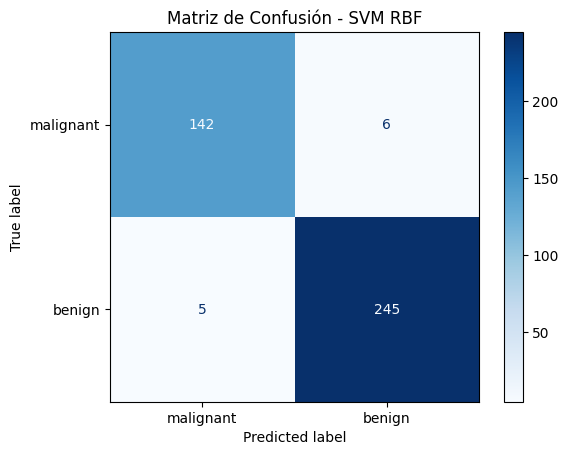

In [20]:
# Datos Originales
# 1 Nombres de las clases
target_names = data.target_names

# 2 Pipeline con SVM RBF
pipeline = Pipeline([
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

# 3 Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4 Accuracy promedio en validación cruzada
accuracy_scores = cross_val_score(pipeline, X_train_scaled, y_train, cv=cv, scoring='accuracy')
print(f"Accuracy promedio (CV): {np.mean(accuracy_scores):.4f}")

# 5 Predicciones cruzadas para métricas detalladas
y_pred = cross_val_predict(pipeline, X_train_scaled, y_train, cv=cv)

# 6 Accuracy global
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy global: {accuracy:.4f}")

# 7 F1-score (macro, micro y por clase)
f1_macro = f1_score(y_train, y_pred, average='macro')
f1_micro = f1_score(y_train, y_pred, average='micro')
f1_per_class = f1_score(y_train, y_pred, average=None)

print(f"F1 (macro): {f1_macro:.4f}")
print(f"F1 (micro): {f1_micro:.4f}")
print("F1 por clase:")
for name, score in zip(target_names, f1_per_class):
    print(f"  {name}: {score:.4f}")

# 8 Matriz de confusión
cm = confusion_matrix(y_train, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - SVM RBF")
plt.grid(False)
plt.show()


Accuracy promedio (CV): 0.7879
Accuracy global: 0.7879
F1 (macro): 0.7413
F1 (micro): 0.7879
F1 por clase:
  malignant: 0.6316
  benign: 0.8511


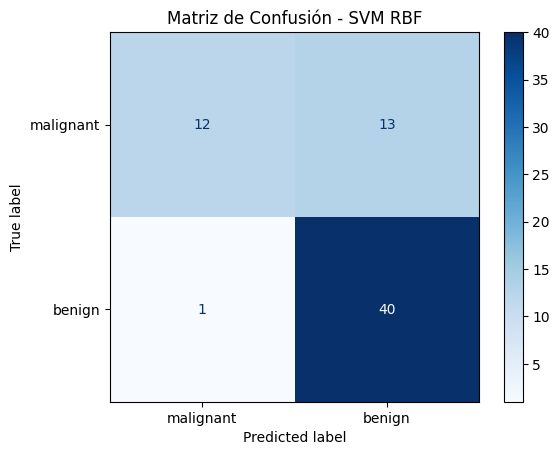

In [21]:
# Datos CNN
# 4 Accuracy promedio en validación cruzada
accuracy_scores = cross_val_score(pipeline, X_cnn, y_cnn, cv=cv, scoring='accuracy')
print(f"Accuracy promedio (CV): {np.mean(accuracy_scores):.4f}")

# 5 Predicciones cruzadas para métricas detalladas
y_pred = cross_val_predict(pipeline, X_cnn, y_cnn, cv=cv)

# 6 Accuracy global
accuracy = accuracy_score(y_cnn, y_pred)
print(f"Accuracy global: {accuracy:.4f}")

# 7 F1-score (macro, micro y por clase)
f1_macro = f1_score(y_cnn, y_pred, average='macro')
f1_micro = f1_score(y_cnn, y_pred, average='micro')
f1_per_class = f1_score(y_cnn, y_pred, average=None)

print(f"F1 (macro): {f1_macro:.4f}")
print(f"F1 (micro): {f1_micro:.4f}")
print("F1 por clase:")
for name, score in zip(target_names, f1_per_class):
    print(f"  {name}: {score:.4f}")

# 8 Matriz de confusión
cm = confusion_matrix(y_cnn, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - SVM RBF")
plt.grid(False)
plt.show()


Accuracy promedio (CV): 0.9870
Accuracy global: 0.9870
F1 (macro): 0.9859
F1 (micro): 0.9870
F1 por clase:
  malignant: 0.9819
  benign: 0.9899


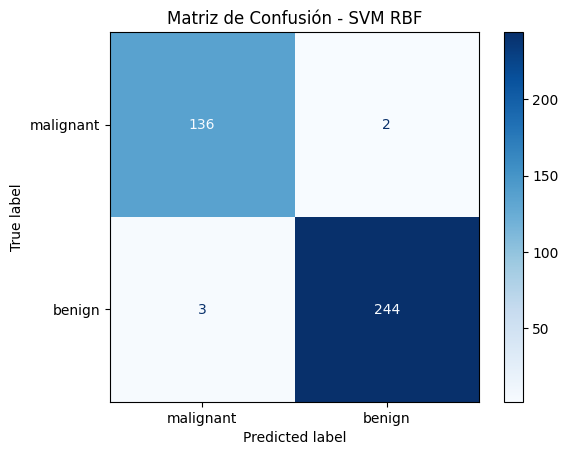

In [22]:
# Datos ENN
# 4 Accuracy promedio en validación cruzada
accuracy_scores = cross_val_score(pipeline, X_clean, y_clean, cv=cv, scoring='accuracy')
print(f"Accuracy promedio (CV): {np.mean(accuracy_scores):.4f}")

# 5 Predicciones cruzadas para métricas detalladas
y_pred = cross_val_predict(pipeline, X_clean, y_clean, cv=cv)

# 6 Accuracy global
accuracy = accuracy_score(y_clean, y_pred)
print(f"Accuracy global: {accuracy:.4f}")

# 7 F1-score (macro, micro y por clase)
f1_macro = f1_score(y_clean, y_pred, average='macro')
f1_micro = f1_score(y_clean, y_pred, average='micro')
f1_per_class = f1_score(y_clean, y_pred, average=None)

print(f"F1 (macro): {f1_macro:.4f}")
print(f"F1 (micro): {f1_micro:.4f}")
print("F1 por clase:")
for name, score in zip(target_names, f1_per_class):
    print(f"  {name}: {score:.4f}")

# 8 Matriz de confusión
cm = confusion_matrix(y_clean, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - SVM RBF")
plt.grid(False)
plt.show()

Accuracy promedio (CV): 0.9599
Accuracy global: 0.9598
F1 (macro): 0.9567
F1 (micro): 0.9598
F1 por clase:
  malignant: 0.9452
  benign: 0.9683


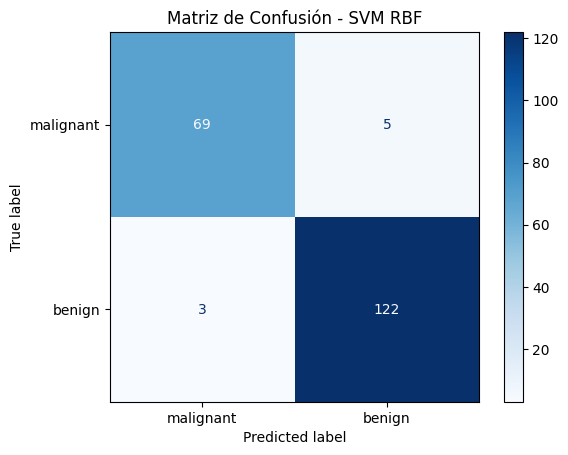

In [23]:
# Datos ENN
# 4 Accuracy promedio en validación cruzada
accuracy_scores = cross_val_score(pipeline, X_proto, y_proto, cv=cv, scoring='accuracy')
print(f"Accuracy promedio (CV): {np.mean(accuracy_scores):.4f}")

# 5 Predicciones cruzadas para métricas detalladas
y_pred = cross_val_predict(pipeline, X_proto, y_proto, cv=cv)

# 6 Accuracy global
accuracy = accuracy_score(y_proto, y_pred)
print(f"Accuracy global: {accuracy:.4f}")

# 7 F1-score (macro, micro y por clase)
f1_macro = f1_score(y_proto, y_pred, average='macro')
f1_micro = f1_score(y_proto, y_pred, average='micro')
f1_per_class = f1_score(y_proto, y_pred, average=None)

print(f"F1 (macro): {f1_macro:.4f}")
print(f"F1 (micro): {f1_micro:.4f}")
print("F1 por clase:")
for name, score in zip(target_names, f1_per_class):
    print(f"  {name}: {score:.4f}")

# 8 Matriz de confusión
cm = confusion_matrix(y_proto, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - SVM RBF")
plt.grid(False)
plt.show()

# --------------------------------------------------------------------------

## 📊 8. Comparar los resultados y reflexión final
- Comparar las métricas de rendimiento obtenidas con cada técnica
- Escribe tus conclusiones sobre el impacto de la reducción de la numerosidad
- ¿Cuál técnica funcionó mejor? ¿Qué ventajas y desventajas observaste?



En general se obtuvieron excelentes métricas con todos los métodos, a excepción de CNN, y esto se debe a que eliminó el 87% de las observaciones, por lo que quedaron muy pocas para el conjunto de entrenamiento y por tanto hubo subajuste, es decir, el modelo no logró aprender correctamente, por otra parte, el que tuvo mejor rendimiento fue el conjunto usando la técnica ENN, la cuál solo eliminó 13 observaciones, este es un gran ejemplo de su uso apropiado, pues bastó con eliminar solo aquellas observaciones que generaban mayor ruido para mejorar el rendimiento del modelo, por otra parte, al usar KN y el dataset original también hubo buenos resultados, pero en general se observa que aplicar el método correcto para reducción de numerosidad puede tener beneficios en el rendimiento del modelo.